# Network Creation

Let's create a small Neural Network with 3 hidden layers for testing

In [7]:
import numpy as np
import pandas as pd
from nn_utils import *

In [8]:
n_hidden_layers = 3
n_neurons = 5
n_outputs = 3
n_inputs = 10

net = NeuralNetwork()
net.add_input_layer(10)

net.add_hidden_layer(10, 15)
net.add_hidden_layer(15, 14)
net.add_hidden_layer(14, 14)
net.add_output_layer(14, 3)


print(net)
print(net.number_of_nodes())

INPUT LAYER: 
NODE 0 OUTPUT = 0.0
NODE 1 OUTPUT = 0.0
NODE 2 OUTPUT = 0.0
NODE 3 OUTPUT = 0.0
NODE 4 OUTPUT = 0.0
NODE 5 OUTPUT = 0.0
NODE 6 OUTPUT = 0.0
NODE 7 OUTPUT = 0.0
NODE 8 OUTPUT = 0.0
NODE 9 OUTPUT = 0.0

LAYER 0 
NODE 0 WEIGHTS = -0.015196119735553905, 0.3683977044964228, -0.23592651831706782, -0.12419121095301679, -0.7134016072685929, 0.11140849399347826, -0.22048513411960438, 0.1274215804049187, -0.2811695084125802, 0.3595477182344658,  BIAS = 0.0
NODE 1 WEIGHTS = 0.44994853452574485, 0.2707893692497311, -0.37567534546524406, 0.4086791053410764, -0.19914827009197714, -0.16260695918539336, -0.1913385298213355, -0.23380634349045057, -0.05469633696776792, -0.2816823248491038,  BIAS = 0.0
NODE 2 WEIGHTS = -0.04578179261961983, 0.17598086964486212, 0.01126358376439534, -0.8979720241645308, -0.668522934780155, -0.2764589922013118, 0.48393309865404294, -0.4618053397251398, 0.4923943653498365, 0.013689672105571574,  BIAS = 0.0
NODE 3 WEIGHTS = -0.2576554773830772, -0.0282313094470

In [9]:
col_names = ('Input1', 'Input2', 'Input3', 'Input4', 'Input5', 'Input6',
             'Input7', 'Input8', 'Input9', 'Input10', 'TARGET_x', 'TARGET_y', 'TARGET_z')
data = pd.read_csv("../ML-23-PRJ-Package/ML-CUP23-TR.csv",
                   skiprows=7, usecols=[i for i in range(1, 14)], names=col_names)

data

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,TARGET_x,TARGET_y,TARGET_z
0,-0.917280,-0.712727,-0.989904,0.992819,0.993649,0.995543,0.711074,0.407645,-0.688548,0.616890,7.897453,-35.936382,21.077147
1,-0.858784,0.998755,-0.998396,0.999909,0.316503,-0.951897,-0.163139,0.980982,0.661759,-0.800155,-9.330632,19.901571,6.069154
2,-0.990441,0.958726,-0.998675,0.997216,0.987166,0.356483,-0.279689,0.599163,-0.684630,0.922901,14.849400,3.374090,19.667479
3,0.937117,0.984474,-0.612420,0.999812,0.728623,-0.539962,-0.165939,0.999352,-0.921444,-0.974766,-46.591854,13.734777,17.953600
4,-0.906628,-0.884567,-0.932487,0.941037,0.978134,0.998179,0.749606,-0.590599,-0.508268,0.691798,8.217500,-45.885254,14.894251
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.803560,-0.878859,-0.978391,0.957539,0.996655,0.996924,-0.226305,0.097814,-0.922666,0.934153,15.389553,-41.068806,27.513502
996,0.718841,0.995748,-0.942678,0.999929,0.747763,-0.808726,0.176132,0.999100,-0.753970,-0.969009,-36.228770,13.067430,11.672133
997,-0.977912,-0.971108,0.956233,-0.979524,0.222033,0.986609,0.658273,-0.987310,0.937697,0.143420,7.265506,-53.497242,2.815666
998,0.284803,-0.988684,-0.427197,0.883317,0.993302,0.999500,-0.019456,-0.648110,-0.955231,0.901298,5.545274,-63.348396,27.989340



# Preparing Dataframe
i.e. creating the training set by removing non-training columns


In [10]:
# shuffle data
data = data.sample(frac=1)

In [11]:
data[:100]

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,TARGET_x,TARGET_y,TARGET_z
877,0.972025,0.410580,0.375335,0.981677,0.821849,0.976445,0.370172,0.997125,-0.801826,-0.990364,-55.809105,-10.995221,23.190393
596,-0.921641,0.996916,-0.996585,0.999201,0.695600,-0.827381,-0.859343,0.962592,-0.283151,0.088003,4.885140,23.510721,25.254839
785,-0.945496,-0.849870,-0.982610,0.845478,0.989746,0.995534,-0.132807,-0.595489,-0.749627,0.967288,17.255964,-43.981915,21.283264
299,-0.847125,0.958732,-0.992248,0.999134,0.991583,0.658474,-0.571817,0.979084,-0.912930,-0.018332,3.743294,7.814204,32.018210
341,-0.752110,-0.981380,0.628611,0.186702,0.973617,0.999561,0.796431,-0.953215,-0.696914,0.831464,7.501262,-64.925200,9.403218
...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.906358,-0.981578,0.049691,0.899411,0.996555,0.999568,-0.161929,0.234609,-0.957945,0.554906,-7.748474,-64.517270,34.682960
444,0.611861,-0.983134,0.971809,-0.993658,-0.081964,0.903549,0.767277,-0.646714,0.932248,-0.942574,-24.396614,-44.692210,3.768535
247,0.727043,0.993637,-0.933711,0.999906,0.842716,-0.688792,-0.382051,0.999030,-0.851263,-0.955829,-35.623497,15.541903,18.137384
340,-0.995151,0.992387,-0.999513,0.999562,0.784210,-0.811411,0.656836,0.317082,0.613851,0.812395,7.300842,5.234912,0.986290


total Error pre-training = 1170.132974146703


Epoch = 1, total Error post-training = 1147.231065846628
Epoch = 2, total Error post-training = 1131.164084918103
Epoch = 3, total Error post-training = 1099.6019753716616
Epoch = 4, total Error post-training = 1034.3684719928153
Epoch = 5, total Error post-training = 914.0642091626889
Epoch = 6, total Error post-training = 767.4718268723085
Epoch = 7, total Error post-training = 621.5569813976047
Epoch = 8, total Error post-training = 625.7764690955314
Epoch = 9, total Error post-training = 628.467665363839
Epoch = 10, total Error post-training = 566.1331498751032
Epoch = 11, total Error post-training = 605.8282751446893
Epoch = 12, total Error post-training = 518.2568533963384
Epoch = 13, total Error post-training = 570.4113272889359
Epoch = 14, total Error post-training = 468.31746789339996
Epoch = 15, total Error post-training = 520.3426408123253
Epoch = 16, total Error post-training = 395.0768567127722
Epoch = 17, total Error post-training = 420.445719010389
Epoch = 18, total Erro

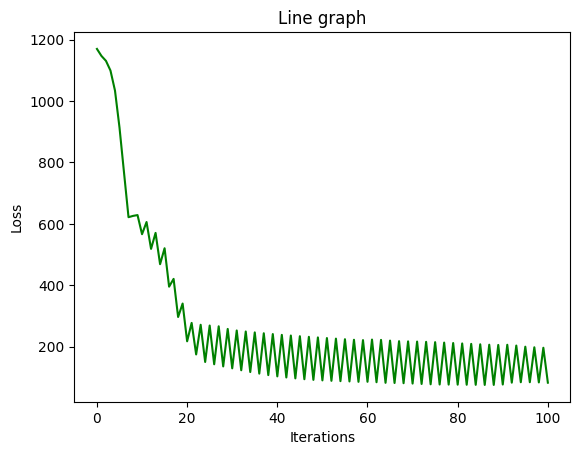

In [12]:
tr_data_X = data[['Input1', 'Input2', 'Input3', 'Input4',
                  'Input5', 'Input6', 'Input7', 'Input8', 'Input9', 'Input10']]

tr_data_Y = data[['TARGET_x', 'TARGET_y', 'TARGET_z']]

# act_fun possible values: "relu", "leaky_relu", "tanh", "sigmoid"

losses = net.train(tr_data_X, tr_data_Y, epochs=100,
                 eta=0.01, clip_value=10000, act_fun="relu")
#print(net)
#print(net.input_layer.weights)

plot_loss(losses)


In [13]:
np.dot(net.hidden_layers[0].output, net.hidden_layers[1].weights)

array([-0.26820892,  1.50313412, -1.56732598,  1.23753551,  0.491628  ,
        0.58680609, -0.48773601, -1.74283761,  0.75509512, -0.78287179,
        4.05144951, -1.38996071,  0.16244633,  1.08322878])

In [14]:
net.output_layer.output

array([ 2.88665706,  2.64035425, 23.15756836])

In [15]:
for row, label in zip(tr_data_X.itertuples(index=False, name=None), tr_data_Y.itertuples(index=False, name=None)):
    # Forward propagation
    net.forwardPropagation( row, label, act_fun = "relu")
    print(np.array(label))
    print(net.output_layer.output)
    break

[-55.809105 -10.995221  23.190393]
[-68.13637505 -13.77154967  29.39426289]


In [16]:
a = np.array([10, -3])

In [17]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

In [18]:
leaky_relu(a)

array([10.  , -0.03])

In [19]:
def clip_gradients(gradients, clip_value):
    clipped_gradients = []
    for gradient in gradients:
        clipped_gradient = np.clip(gradient, -clip_value, clip_value)
        clipped_gradients.append(clipped_gradient)
    return clipped_gradients

In [20]:
data[:100]

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,TARGET_x,TARGET_y,TARGET_z
877,0.972025,0.410580,0.375335,0.981677,0.821849,0.976445,0.370172,0.997125,-0.801826,-0.990364,-55.809105,-10.995221,23.190393
596,-0.921641,0.996916,-0.996585,0.999201,0.695600,-0.827381,-0.859343,0.962592,-0.283151,0.088003,4.885140,23.510721,25.254839
785,-0.945496,-0.849870,-0.982610,0.845478,0.989746,0.995534,-0.132807,-0.595489,-0.749627,0.967288,17.255964,-43.981915,21.283264
299,-0.847125,0.958732,-0.992248,0.999134,0.991583,0.658474,-0.571817,0.979084,-0.912930,-0.018332,3.743294,7.814204,32.018210
341,-0.752110,-0.981380,0.628611,0.186702,0.973617,0.999561,0.796431,-0.953215,-0.696914,0.831464,7.501262,-64.925200,9.403218
...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.906358,-0.981578,0.049691,0.899411,0.996555,0.999568,-0.161929,0.234609,-0.957945,0.554906,-7.748474,-64.517270,34.682960
444,0.611861,-0.983134,0.971809,-0.993658,-0.081964,0.903549,0.767277,-0.646714,0.932248,-0.942574,-24.396614,-44.692210,3.768535
247,0.727043,0.993637,-0.933711,0.999906,0.842716,-0.688792,-0.382051,0.999030,-0.851263,-0.955829,-35.623497,15.541903,18.137384
340,-0.995151,0.992387,-0.999513,0.999562,0.784210,-0.811411,0.656836,0.317082,0.613851,0.812395,7.300842,5.234912,0.986290
